In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.experimental import enable_halving_search_cv
from sklearn.base import clone
from sklearn import datasets
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,recall_score,confusion_matrix,mean_squared_error,precision_score,recall_score,fbeta_score,f1_score,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDClassifier,SGDRegressor,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,KFold,cross_val_score,ShuffleSplit,cross_val_predict,GridSearchCV,RandomizedSearchCV,HalvingRandomSearchCV,HalvingGridSearchCV
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn import preprocessing
import re
import matplotlib as mpl
from pandas_profiling import ProfileReport
pd.set_option("display.precision", 6)
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification, fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC

## linear regression equation has 2 forms: 1-   ŷ = θ0 + θ1x1 + θ2x2 + ⋯ + θnxn <br>
where: • ŷ is the predicted value. <br>
• n is the number of features.<br>
• xi is the ith feature value.<br>
## 2-   Vectorized form: y = hθ x = θ(T) · x
where: • θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.<br>
• x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.<br>
• θ · x is the dot product of the vectors θ and x, which is of course equal to θ0x0 + θ1x1 + θ2x2 + ... + θnxn.<br>
• hθ is the hypothesis function, using the model parameters θ.<br>

so, in the trainig phase you have the features (Xs), and the (y), and you want to get model parameters (θs), to get the hypothesis function(hθ),<br>
while, in testing phase you have hypothesis function(hθ), and features (Xs), and you are predicting the values (ŷ).<br>

The vectorized form will return a scalar value, so, we will use this equation to get the prediction: ŷ = θ(transpose)x, this will return a matrix contains all the predicted value.  

## performance of regression models can be determined by many ways:<br>
1-  MSE (Mean Squared Error) cost function =  1/m ((i=1 Σ m (θ⊺x(i) − y(i))^2), this calculates the summation of predicted values minus the labels all squared, so the negative values don't cancel the positive ones, as the following picture explains 

![Regression-terminologies-Page-2-1024x619](https://user-images.githubusercontent.com/96451039/200897096-667d2bb5-aa10-46ae-ad25-f8bbf8d38968.png)


so, to minimize error we want a to decrease thetas as possible, there is a function called Normal Equation used to minimize thetas.<br>
## Normal Equation = θ(hat) = (1/(X(⊺)X)) * (X(⊺)y) <br>
where • θ(hat) is the value of θ that minimizes the cost function.

In [2]:
# training set
# here we computed the best thetas for hypothesis
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance (bias term)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.13872779],
       [2.81971355]])

In [3]:
# testing set
# now let's make prediction using thetas
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.13872779],
       [9.7781549 ]])

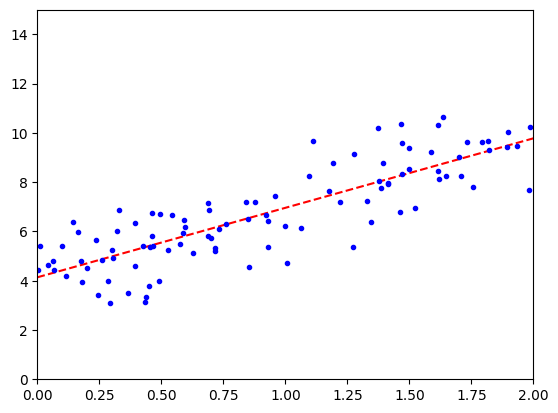

In [4]:
# using matplotlib
plt.plot(X_new, y_predict,"r--")
plt.plot(X, y,"b.")
plt.axis([0, 2, 0, 15])
plt.show()

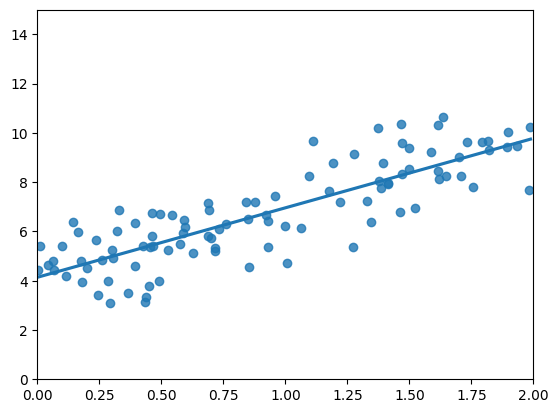

In [5]:
# using seaborn
sns.regplot(X, y,ci=None)
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"bias term: {lin_reg.intercept_} \ncoefficient: {lin_reg.coef_} \n")
print(lin_reg.predict(X_new))

bias term: [4.13872779] 
coefficient: [[2.81971355]] 

[[4.13872779]
 [9.7781549 ]]


## so, prediction manually equals to prediction automatically

## Gradient Descent
it is used to minimize the cost function (MSE) as possible by setting the optimized values for Thetas

![GD](https://user-images.githubusercontent.com/96451039/200897220-4d7b18f9-4d21-408e-b0f6-050a5760105f.png)


Gradient descent work by firstly, set random thetas, then go to calculate cost function, and this step will be done untill the cost function is minimum, at this momnet it catches the optimized Thetas

An important parameter in Gradient Descent is the size of the steps, determined by
the learning rate hyperparameter. If the learning rate is too small, then the algorithm
will have to go through many iterations to converge, which will take a long time, as the following figure shows.

![small steps](https://user-images.githubusercontent.com/96451039/200897337-29e2695e-3948-4b4d-8534-ad130b9a71ab.png)


On the other hand, if the learning rate is too high, you might jump across the valley
and end up on the other side, possibly even higher up than you were before. This
might make the algorithm diverge, with larger and larger values, failing to find a good
solution as the following figure shows.

![big steps](https://user-images.githubusercontent.com/96451039/200897394-c1c4b292-3a4f-46ae-95eb-e952dfaef603.png)

When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

There is another type of gradient descent called Stochastic Gradient descent we will use it now

In [7]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y)

SGDRegressor(eta0=0.1, penalty=None)

In [8]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10346267]), array([2.79611242]))

## here is how linear regression normally works
The pseudoinverse itself is computed using a standard matrix factorization technique
called Singular Value Decomposition (SVD) that can decompose the training set
matrix X into the matrix multiplication of three matrices U Σ V⊺ (see
numpy.linalg.svd()). The pseudoinverse is computed as X+ = VΣ+U⊺. To compute
the matrix Σ+, the algorithm takes Σ and sets to zero all values smaller than a tiny
threshold value, then it replaces all the nonzero values with their inverse, and finally
it transposes the resulting matrix. This approach is more efficient than computing the
Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
not work if the matrix X⊺X is not invertible (i.e., singular), such as if m < n or if some
features are redundant, but the pseudoinverse is always defined.

![linear regression algorithms](https://user-images.githubusercontent.com/96451039/200897455-8be53fe2-c242-4dd1-b8b0-b3244def0335.png)


## Polynomial Regression
if data is like the following figure u can't use a straight line to fit data(linear regression)

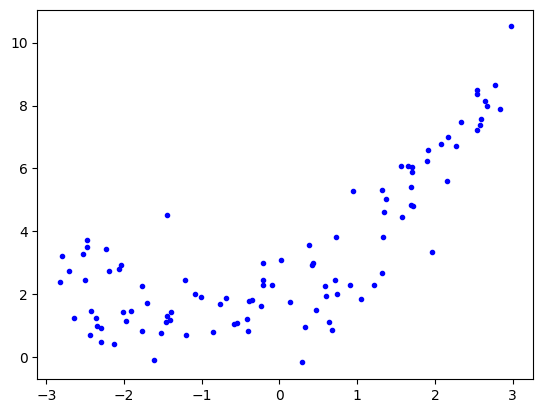

In [9]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X,y,'b.')
plt.show()

so, you have to transform features by the polynomial features (polynomial regression)

In [10]:
poly_features = preprocessing.PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])
# X_poly now contains the original feature of X plus the square of this feature.

[-0.41420128]
[-0.41420128  0.1715627 ]


[1.84575685] [[1.06373029 0.49504916]]


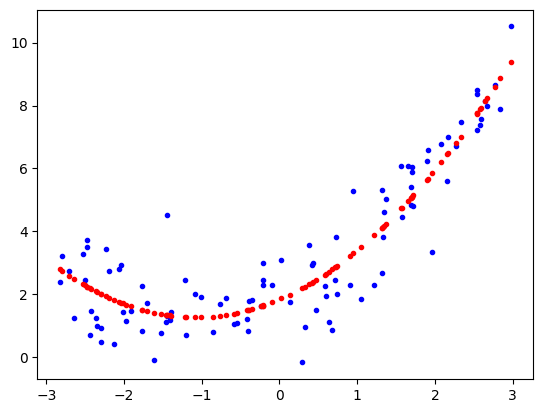

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
y_predict = lin_reg.predict(X_poly)
plt.plot(X,y,'b.')
plt.plot(X,y_predict,'r.')
plt.show()


## Regularization

## Ridge regression

In [12]:
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.90639616]])

## Lasso Regression

In [13]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.86099065])

## Elastic net

In [14]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.86061832])

## Logistic Regression
Logistic
Regression model computes a weighted sum of the input features (plus a bias term),
but instead of outputting the result directly like the Linear Regression model does, it
outputs the logistic of this result<br>
p(hat) = hθ (x) = σ (x⊺θ) this outputs a number between 0 and 1 [p stands for probability]<br>
σ (t) = 1 / (1 + exp (− t))<br>
y = 0 if p < 0.5 (0 as negative class)<br> or 1 if p ≥ 0.5 (1 as positive class)<br>

![logistic function](https://user-images.githubusercontent.com/96451039/200897526-8eda9f2f-9e6a-4b47-8c2a-2cb77a508811.png)


The previous figure is the logistic function, notice that when t < 0, therefore σ (t) < 0.5, and when t >= 0, therefore σ (t) >= 0.5<br>
So, we can say that model predicts 1 if (x⊺θ) is positive, and 0 if (x⊺θ) is negative

## logistic regression Cost function


![log loss function](https://user-images.githubusercontent.com/96451039/200897587-869c82de-2b1c-4739-a63f-a074098a18b6.png)


if y-predicted is equal to label, therefore the error is min., try it by substituting in the cost function, otherwise the error is high.

In [15]:
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris virginica, else 0

In [16]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression()

In [18]:
y_pred = clf.predict([[1.7], [1.5]])
y_pred

array([1, 0])